## Image Processing is divided into 6 steps

### Step 1: Load the Dependencies
Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow    
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

### Step 2: Read Image from URLs

In [ ]:
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
"https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
"https://placekitten.com/800/571"]

for url in urls:
  image = io.imread(url)
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  final_frame = cv.hconcat((image, image_2))
  cv2_imshow(final_frame)
  print('\n')

Output hidden; open in https://colab.research.google.com to view.

### Step 3: Image Contours and Histograms

In [ ]:
print(image.dtype)
print(image.shape[0])
print(image.shape[1])
print(image.shape[2])

uint8
571
800
3


Height of image, width of image, number of channels of the image.
**The histogram of all the pixels in the color image.**

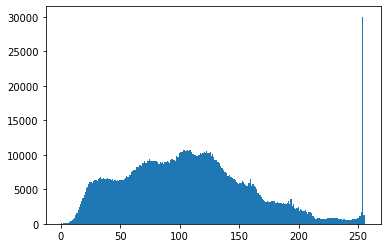

In [ ]:
plt.hist(image.ravel(),bins = 256, range = [0,256])
plt.show()

**Display the histogram of R, G, B channel. We could observe that the green channel has many pixels in 255, which represents the white patch in the image.**

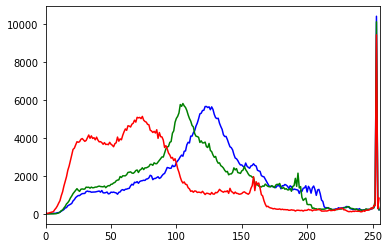

In [ ]:
color = ('b','g','r')
for i, col in enumerate(color):
  histr = cv.calcHist([image],[i],None,[256],[0,256])
  plt.plot(histr,color = col)
  plt.xlim([0,256])
plt.show()

**Now try to make a gray image. Here, we successfully got a gray image. Plot the histogram of the gray image.**

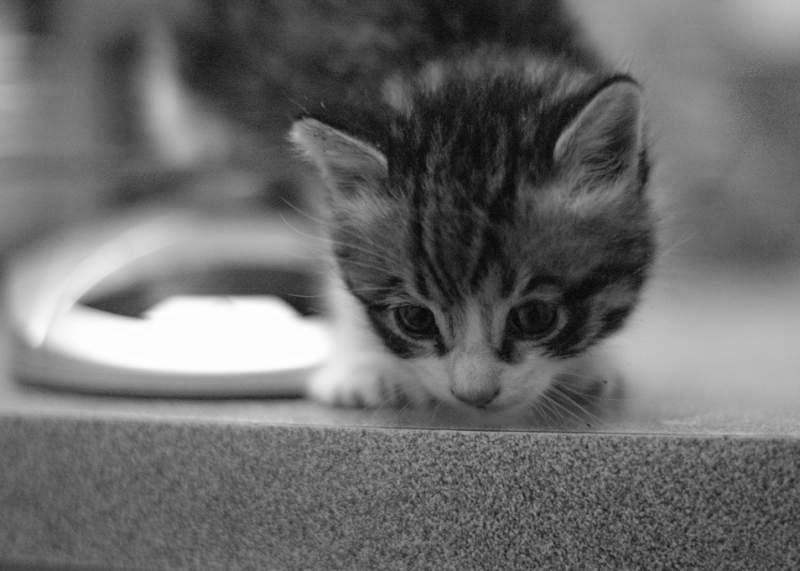

In [ ]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

**We could observe that the frequency of the image hist has decreased 1/3 of the histogram of color image.**

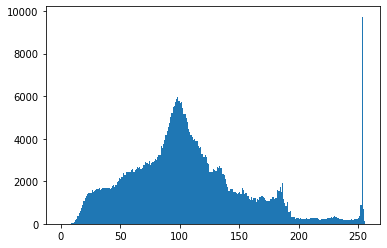

In [ ]:
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()

### Find image contour of the grayscale image


Method 1: Use the matplotlib. contour


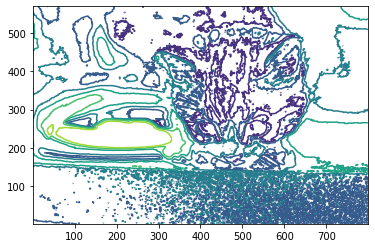

In [ ]:
plt.contour(gray_image, origin = "image")

### Step 4: Grayscale Transform and Histogram Equalization
Grayscale Transformation provides some examples of conducting mathematical transformations of the grayscale image.

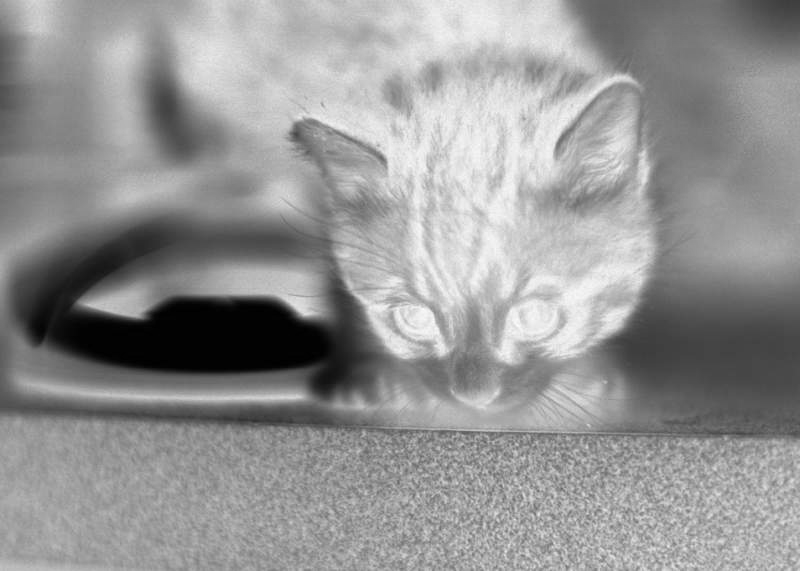

In [ ]:
im2 = 255 - gray_image
cv2_imshow(im2)

**This is an inverse operation of the grayscale image. you could see that the bright pixels become dark, and the dark pixels become bright.**

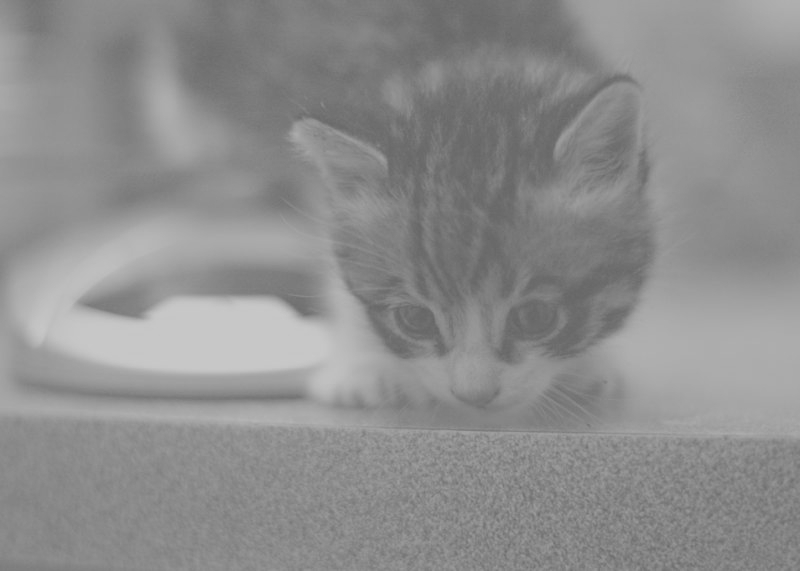

In [ ]:
im3 = (100.0/255)*gray_image + 100
cv2_imshow(im3)

Another transform of the image, after adding a constant.
All the pixels become brighter and a hazing-like effect of the image is generated. The lightness level of the gray image decreases after this step. 

### Step 5: Fourier Transform of Gray Images
A Fourier transform is used to find the frequency domain of an image.
let’s move on with a code. it Blurs the grayscale image by a Gaussian filter with kernel size of 10 and Transform the image to frequency domain.

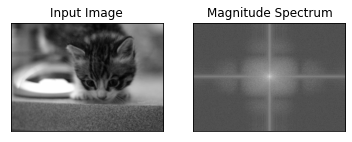

In [ ]:
imBlur = cv.blur(gray_image,(5,5))
f = np.fft.fft2(imBlur)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

### Step 6: Finding Edges by Highpass Filtering in FF
This final step demonstrates the conducting of a high pass filter to remove the low frequency component, resulting in a sharpened image which contains the edges.

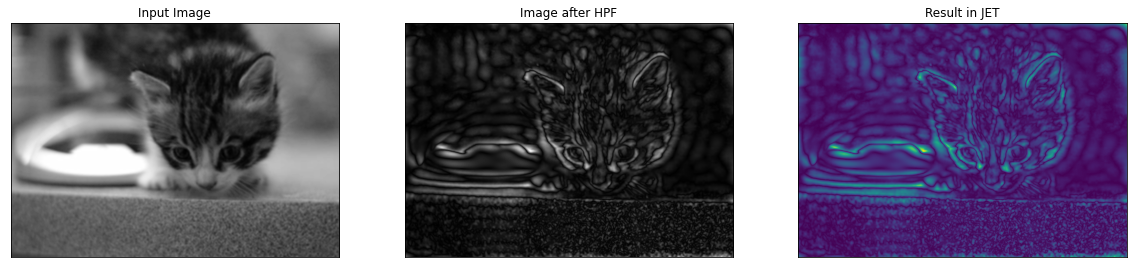

In [ ]:
rows, cols = imBlur.shape
crow, ccol = round(rows/2) , round(cols/2)
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()